In [2]:
import os,shutil

In [3]:
origin_dataset_dir = 'D:\sj\cats'

In [4]:
base_dir = 'D:\sj\cats\cats_and_dogs_small'

In [5]:
import keras

Using TensorFlow backend.


In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
train_dir = 'D:\\sj\cats\\cats_and_dogs_small\\train'
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,
                                                    class_mode='binary')

Found 2002 images belonging to 2 classes.


In [10]:
test_dir = 'D:\\sj\cats\\cats_and_dogs_small\\test'
test_generator = train_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [11]:
for data_batch,label_batch in train_generator:
    print(data_batch.shape)
    print(label_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [12]:
from keras import layers


In [13]:
from keras import models

In [14]:
model = models.Sequential()

In [15]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))

In [16]:
model.add(layers.MaxPooling2D((2,2)))

In [17]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))


In [18]:
model.add(layers.MaxPooling2D((2,2)))

In [19]:
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [20]:
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [21]:
model.add(layers.Flatten())

In [22]:
model.add(layers.Dense(512,activation='relu'))

In [23]:
model.add(layers.Dense(1,activation='sigmoid'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [25]:
from keras import optimizers

In [26]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,
                              validation_data=test_generator,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 134s 1s/step - loss: 0.6921 - acc: 0.5105 - val_loss: 0.6788 - val_acc: 0.5530
Epoch 2/30
100/100 [==============================] - 72s 724ms/step - loss: 0.6550 - acc: 0.6130 - val_loss: 0.6794 - val_acc: 0.5540
Epoch 3/30
100/100 [==============================] - 73s 727ms/step - loss: 0.6131 - acc: 0.6705 - val_loss: 0.6127 - val_acc: 0.6810
Epoch 4/30
100/100 [==============================] - 72s 721ms/step - loss: 0.5696 - acc: 0.7040 - val_loss: 0.6298 - val_acc: 0.6500
Epoch 5/30
100/100 [==============================] - 74s 743ms/step - loss: 0.5430 - acc: 0.7165 - val_loss: 0.6088 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 72s 724ms/step - loss: 0.5184 - acc: 0.7455 - val_loss: 0.5749 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 72s 719ms/step - loss: 0.4980 - acc: 0.7501 - val_loss: 0.5591 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 72

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
acc = history.history['acc']

In [30]:
val_acc = history.history['val_acc']

In [31]:
loss = history.history['loss']

In [33]:
val_loss = history.history['val_loss']

In [34]:
epochs = range(1,len(acc)+1)

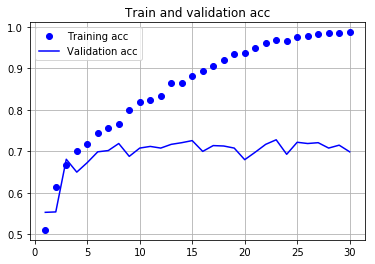

In [38]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt,plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Train and validation acc')
plt.legend()
plt.grid()